In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat
from scipy.stats import gaussian_kde, linregress
import pickle as pkl
from utils import u_plot as uplot, u_darrays as uda, u_met
import pandas as pd

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (30., 30.)
#%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
era_all = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_5-8N_2000-2014_18UTC_front.p', 'rb'))
era_clim = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_5-8N_2000-2014_18UTC_front_CLIM.p', 'rb'))

In [4]:
def get_col(var):
    vdic = {}
    vdic['low'] = []
    vdic['high'] = []
    vdic['mean'] = []
    for v in var:
        
        vdic['low'].append(v.flatten()[16])
        vdic['high'].append(v.flatten()[9])
        vdic['mean'].append(np.array(v).flatten().mean())        
    return vdic

In [5]:
def get_q(var):
    vdic = {}
    vdic['low'] = []
    for v in var:
        
        vdic['low'].append(np.array(v[12:16]).sum())
     
    return vdic

In [6]:
era_all['dates'][0].month

1

In [7]:
dq_s = np.array(era_all['q925_s'])*1000-np.array(era_clim['q925_s'])*1000
dq = np.array(era_all['q925'])*1000-np.array(era_clim['q925'])*1000

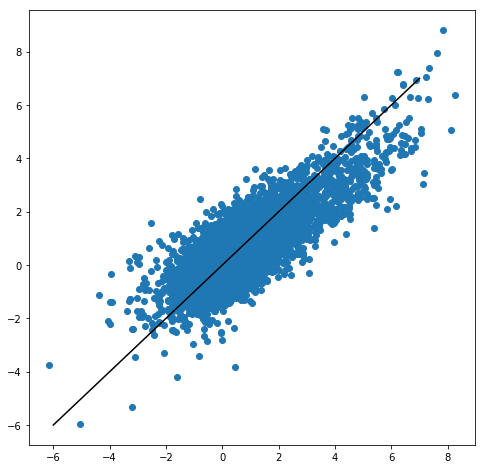

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(np.array(era_all['q925_s'])*1000-np.array(era_clim['q925_s'])*1000, np.array(era_all['q925'])*1000-np.array(era_clim['q925'])*1000)
plt.plot(np.arange(-6,8), np.arange(-6,8), 'k')

(-20, 20)

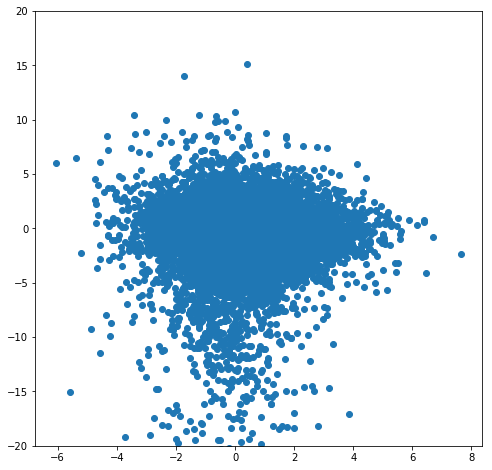

In [9]:
plt.figure(figsize=(8,8))
plt.scatter((np.array(era_all['t2'])-np.array(era_all['t2_s']))- (np.array(era_clim['t2'])-np.array(era_clim['t2_s'])),np.array(era_all['divMoist'])*10000)
plt.ylim(-20,20)
#plt.plot(np.arange(-6,8), np.arange(-6,8), 'k')

(array([9.000e+00, 9.000e+01, 5.920e+02, 2.666e+03, 5.591e+03, 3.344e+03,
        1.040e+03, 1.950e+02, 3.100e+01, 5.000e+00]),
 array([-6.06478882, -4.69274597, -3.32070313, -1.94866028, -0.57661743,
         0.79542542,  2.16746826,  3.53951111,  4.91155396,  6.2835968 ,
         7.65563965]),
 <a list of 10 Patch objects>)

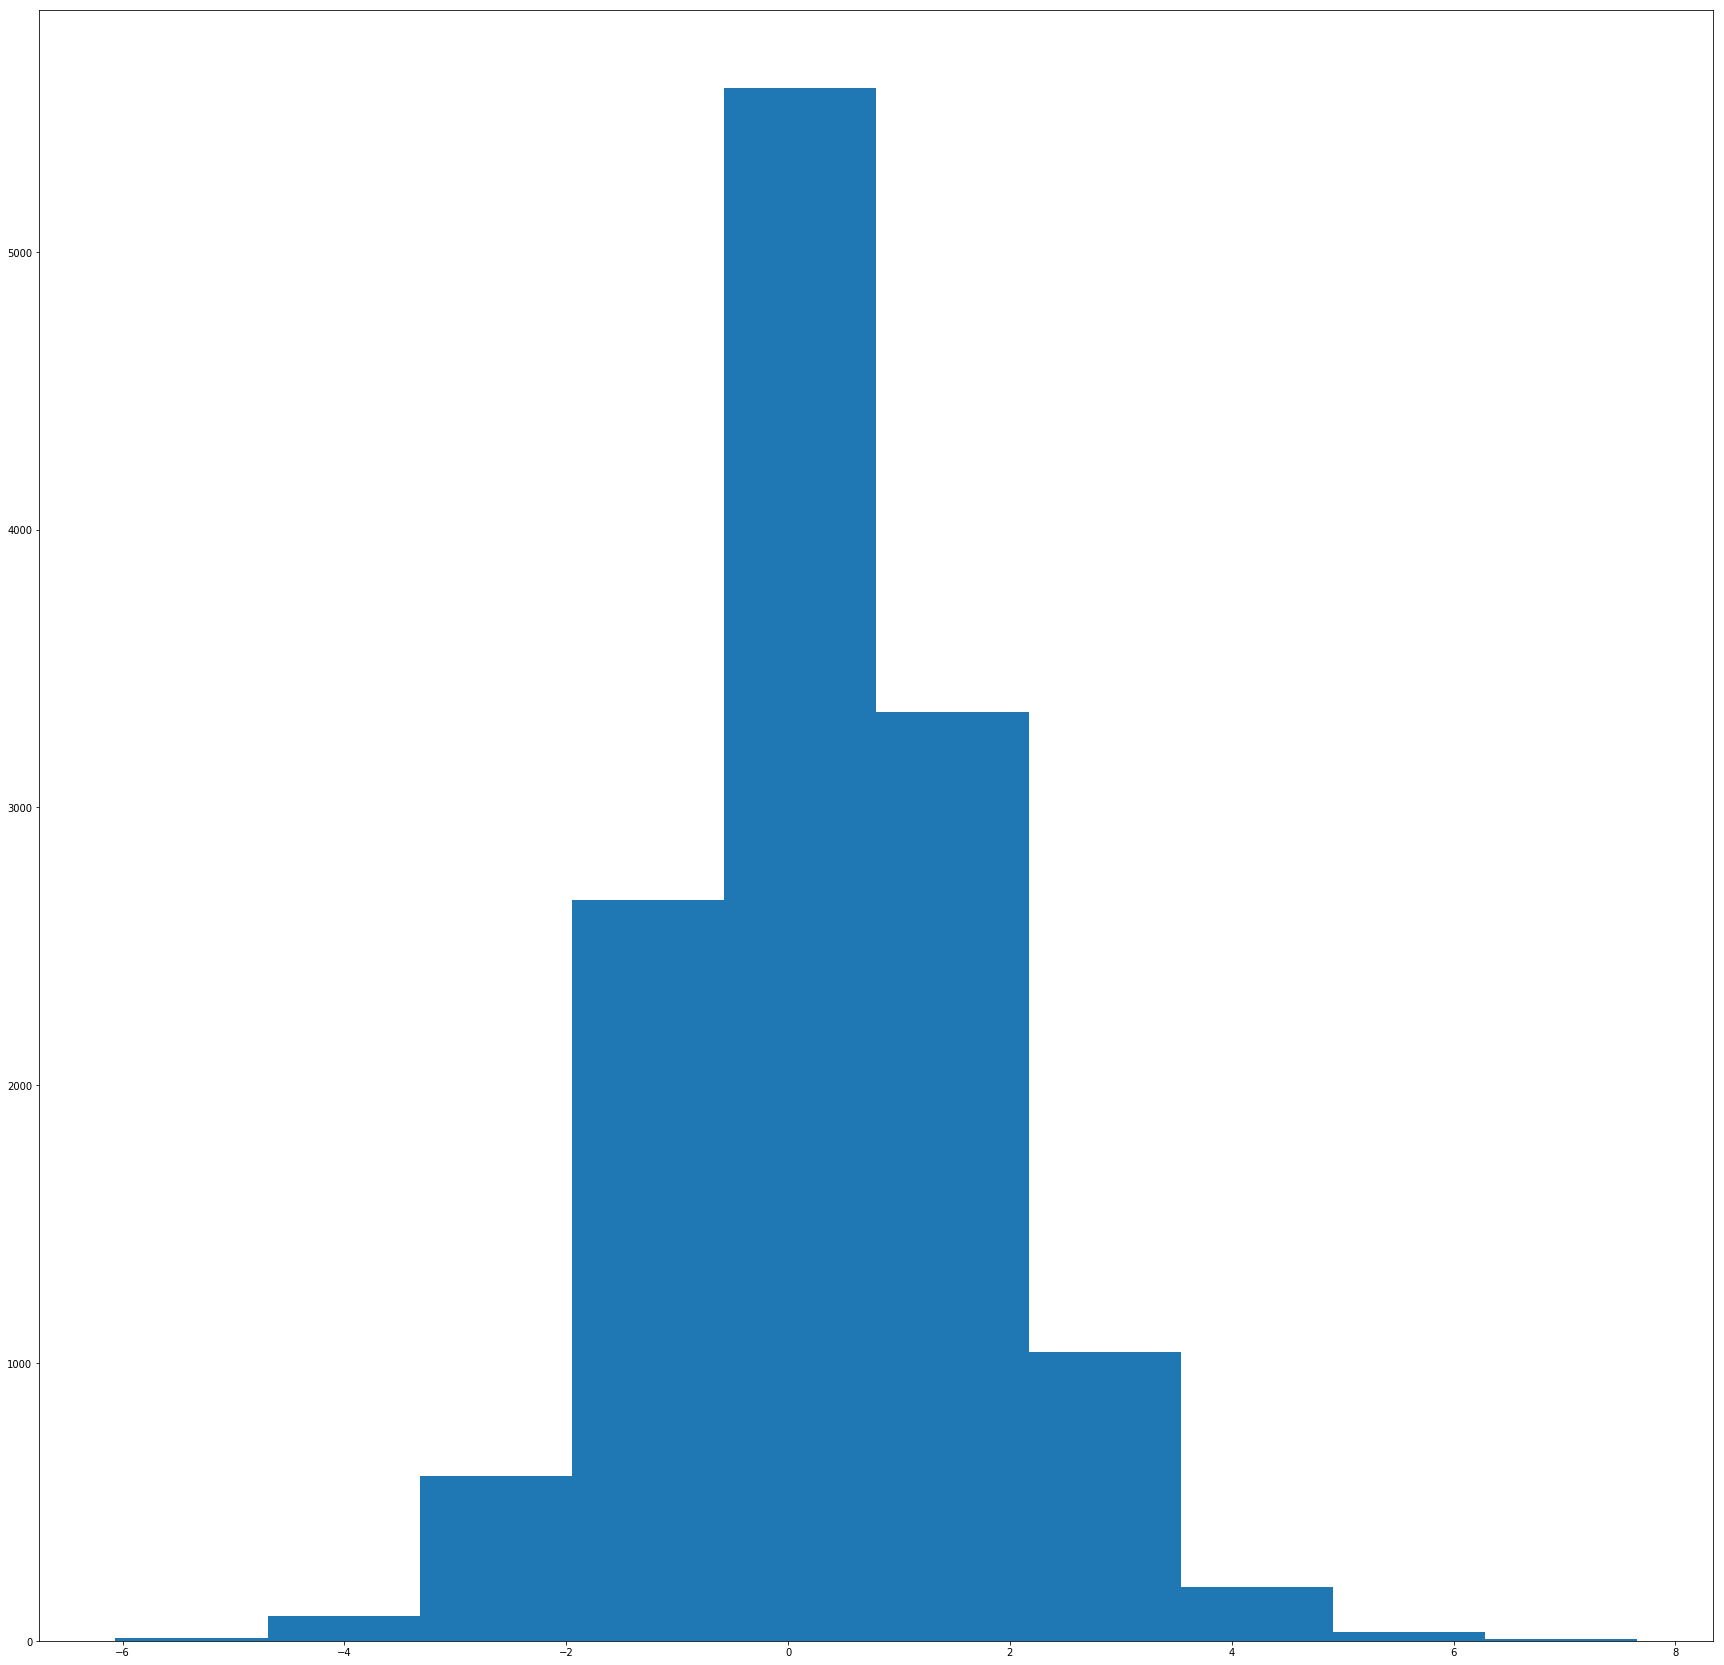

In [10]:
plt.hist((np.array(era_all['t2'])-np.array(era_all['t2_s']))- (np.array(era_clim['t2'])-np.array(era_clim['t2_s'])))

In [23]:
def density_plot(v1,v2):
    xy = np.vstack([v1, v2])
    z = gaussian_kde(xy)(xy)
    data = z / (z.max() - z.min())

    r = stats.pearsonr(v1,v2)
    print('pears', stats.pearsonr(v1,v2))
    
    return data, r

pears (-0.25708544369615105, 1.1728978965679173e-203)
pears (-0.2954838747956078, 2.1611101671620205e-271)
pears (-0.18531058851684998, 4.6528739482444515e-105)


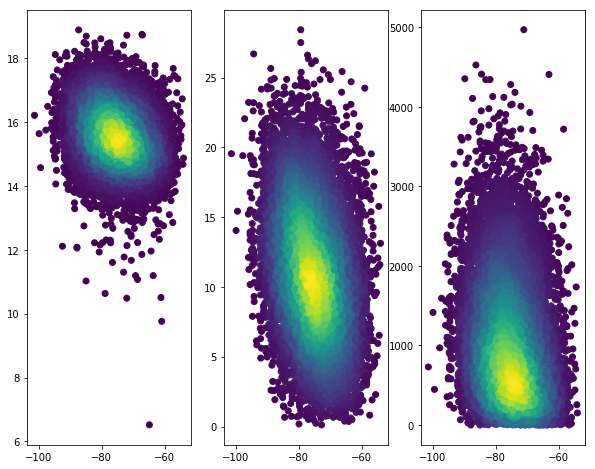

In [16]:
f=plt.figure(figsize=(10,8))
ax = f.add_subplot(131)

udic = get_col(era_all['u_col'])
vdic = get_col(era_all['v_col'])

ushear = (np.array(udic['high'])-np.array(udic['low']))
vshear = (np.array(vdic['high'])-np.array(vdic['low']))

shearss = u_met.u_v_to_ws_wd(ushear, vshear)
v1 =(np.array(era_all['q925']))*1000# np.array(shearss[0])
v2 = np.array(era_all['tmin'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')

ax = f.add_subplot(132)
v1 =np.array(shearss[0])
v2 = np.array(era_all['tmin'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')

ax = f.add_subplot(133)
v1 = (np.array(era_all['CAPE']))
v2 = np.array(era_all['tmin'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')

pears (0.10885479671470373, 4.9510698849398955e-37)


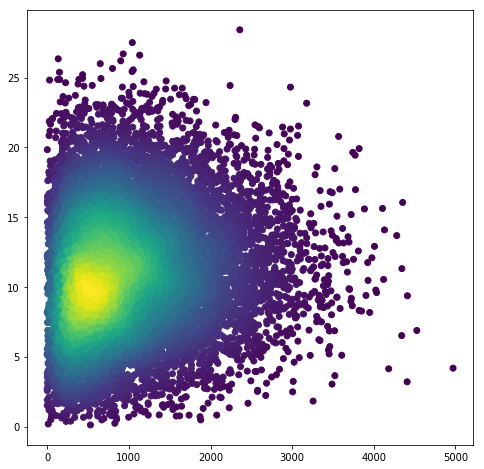

In [17]:
plt.figure(figsize=(8,8))

udic = get_col(era_all['u_col'])
vdic = get_col(era_all['v_col'])

ushear = (np.array(udic['high'])-np.array(udic['low']))
vshear = (np.array(vdic['high'])-np.array(vdic['low']))

shearss = u_met.u_v_to_ws_wd(ushear, vshear)
v1 = np.array(shearss[0])
v2 = np.array(era_all['CAPE'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')
#plt.plot(np.arange(-100,-50), np.arange(-100,-50)*0, 'k')

pears (-0.049288374283719724, 9.295880085002773e-09)


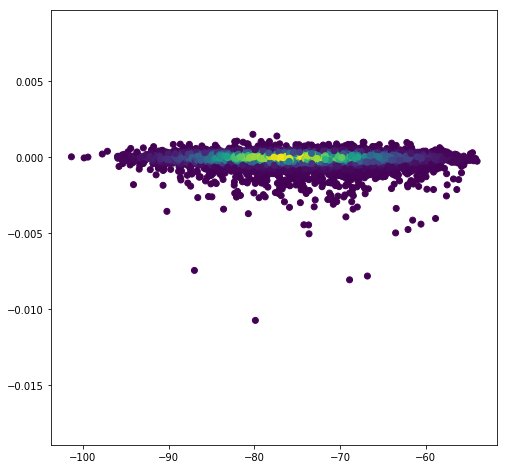

In [20]:
plt.figure(figsize=(8,8))
v1 = era_all['divMoist']
v2 = era_all['tmin']
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')
#plt.plot(np.arange(-100,-50), np.arange(-100,-50)*0, 'k')

In [21]:
era_all.keys()

dict_keys(['q700', 'tmean', 'u650', 'u925', 'v_col', 't2_s', 't2', 'tmin', 'q_col', 'u650_s', 't_col_s', 'u_col', 'q925', 'area70', 't10', 'r_col_s', 'd_col', 'd925', 'divMoist_s', 'level', 'd_col_s', 'slp', 'tcwv', 't_col', 'area', 'q700_s', 'lon', 'CAPE_s', 'dates', 'u_col_s', 'CAPE', 'v_col_s', 'tcwv_s', 'q_col_s', 'q925_s', 'd925_s', 'divMoist', 'slp_s', 'lat', 'r_col', 'u925_s'])

(array([1.000e+00, 6.000e+00, 8.000e+00, 1.300e+01, 1.600e+01, 3.900e+01,
        4.200e+01, 7.900e+01, 8.100e+01, 8.800e+01, 9.600e+01, 1.430e+02,
        1.950e+02, 3.270e+02, 6.000e+02, 1.582e+03, 3.894e+03, 3.969e+03,
        2.138e+03, 2.460e+02]),
 array([0.00668727, 0.00719612, 0.00770497, 0.00821382, 0.00872268,
        0.00923153, 0.00974038, 0.01024924, 0.01075809, 0.01126694,
        0.01177579, 0.01228465, 0.0127935 , 0.01330235, 0.0138112 ,
        0.01432006, 0.01482891, 0.01533776, 0.01584661, 0.01635547,
        0.01686432]),
 <a list of 20 Patch objects>)

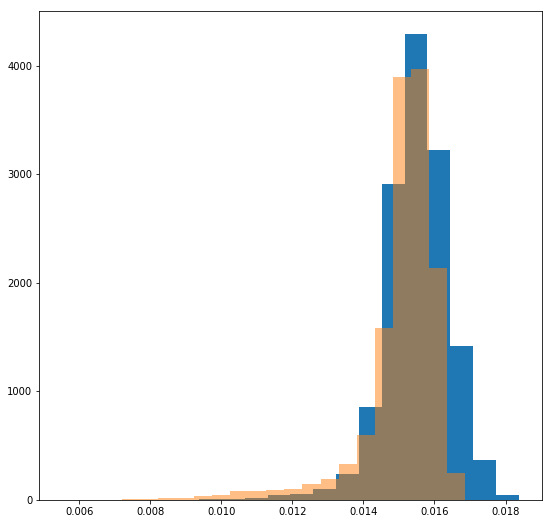

In [22]:
plt.figure(figsize=(9,9))
plt.hist(np.array(era_all['q925_s']), bins=20)
plt.hist(np.array(era_clim['q925_s']), bins=20, alpha=0.5)

pears (-0.14953388845404794, 1.1666911922961103e-68)


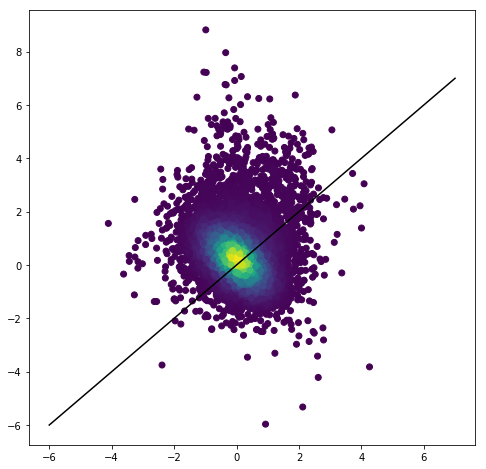

In [24]:
plt.figure(figsize=(8,8))
v1 = (np.array(era_all['q925_s'])-np.array(era_clim['q925_s']))*1000-(np.array(era_all['q925'])-np.array(era_clim['q925']))*1000
v2 = (np.array(era_all['u650'])-np.array(era_clim['u650'])) - (np.array(era_all['u925'])-np.array(era_clim['u925']))
v2 = (np.array(era_all['q925'])-np.array(era_clim['q925']))*1000
data, r = density_plot(v1, v2)
plt.scatter(v1,v2, c=data, cmap='viridis')
plt.plot(np.arange(-6,8), np.arange(-6,8), 'k')

In [25]:
diff = dq_s-dq
print(np.sum(diff>0))
print(np.sum(diff<0))

7238
6325


(array([1.000e+00, 4.000e+00, 9.000e+00, 9.000e+00, 3.300e+01, 9.400e+01,
        2.870e+02, 8.830e+02, 2.114e+03, 3.616e+03, 3.390e+03, 1.825e+03,
        7.790e+02, 3.120e+02, 1.300e+02, 5.100e+01, 1.400e+01, 5.000e+00,
        3.000e+00, 4.000e+00]),
 array([-4.1071102 , -3.68877933, -3.27044846, -2.8521176 , -2.43378673,
        -2.01545586, -1.59712499, -1.17879412, -0.76046325, -0.34213238,
         0.07619848,  0.49452935,  0.91286022,  1.33119109,  1.74952196,
         2.16785283,  2.5861837 ,  3.00451457,  3.42284543,  3.8411763 ,
         4.25950717]),
 <a list of 20 Patch objects>)

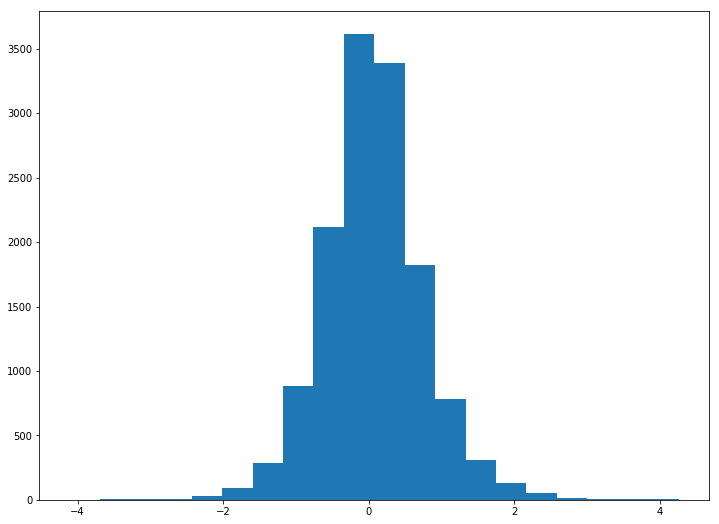

In [26]:
plt.figure(figsize=(12,9))
plt.hist(diff, bins=20)

In [27]:
level = era_all.pop('level')
level = era_clim.pop('level')

In [28]:
era_all_qsum = get_q(era_all['q_col'])
era_all['q_col_sum'] = era_all_qsum['low']
era_all_qsum_storm = get_q(era_all['q_col_s'])
era_all['q_col_sum_s'] = era_all_qsum_storm['low']

In [29]:
era_new = era_all.copy()
dic_months = {}
for ii in range(1,13):
    dic_months[str(ii)] = era_all.copy()
octt = era_all.copy()
marchh = era_all.copy()

In [30]:
for k in era_all.keys():
    print(k)
#     if k == 'dates':
#         continue
    varlist = []
    varo = []
    varm = []
    for ids, ise in enumerate(era_all[k]):
        
#         if k in ['tmean', 'tmin', 't10', 'area', 'area70']:
#             diff = np.array(ise)
#         else:
#             diff = np.array(ise)-np.array((era_clim[k])[ids])
            
        if 'q' not in k:
            diff = np.array(ise)
        else:
            diff = np.array(ise)#-np.array((era_clim[k])[ids])
        
#         if ((era_all['dates'][ids].month <=6) & (era_all['dates'][ids].month >=3)) | \
#         ((era_all['dates'][ids].month >=9) & (era_all['dates'][ids].month <=11)):
        varlist.append(diff)
            
        if era_all['dates'][ids].month == 3:
            varm.append(diff)
        if era_all['dates'][ids].month == 10:
            varo.append(diff)
    era_new[k] = np.array(varlist)          
    octt[k] = np.array(varo)
    marchh[k] = np.array(varm)

q700
tmean
u650
q_col_sum
u925
v_col
t2_s
t2
tmin
q_col
u650_s
t_col_s
u_col
q925
area70
t10
r_col_s
d_col
d925
divMoist_s
d_col_s
slp
tcwv
t_col
area
q700_s
lon
CAPE_s
dates
u_col_s
CAPE
v_col_s
tcwv_s
q_col_s
q925_s
q_col_sum_s
d925_s
divMoist
slp_s
lat
r_col
u925_s


In [31]:
qmsort = np.argsort(marchh['q925'])
qm = marchh['q925'][qmsort]

In [32]:
marchh['u_col'][10]

array([ -1.7891827 ,   6.7932396 ,   5.4414253 ,   1.5352516 ,
         1.674757  ,  -1.7933674 ,  -5.8209114 , -10.752457  ,
       -11.562988  , -12.801804  , -13.225903  , -11.458359  ,
        -4.8834305 ,  -3.0740337 ,  -2.8117619 ,  -1.2660332 ,
        -0.85588455,  -0.7261448 ,  -0.56710815], dtype=float32)

In [33]:
def sort_vars(dic):
    q925 = np.array(dic['q925'])
    q925s = np.array(dic['q925_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))
    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    shears =   shearss[0] #np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]  #
    
    
    q925 = (q925) #np.array(qdics['high'])-np.array(qdic['high'])#
    q925diff = q925s - q925
    print(np.sum(q925diff>0))
    print(np.sum(q925diff<0))
    sort = np.argsort(q925)
    q = q925[sort]*1000
   
    shear = shears[sort]
    tmin = np.array(dic['tmin'])[sort]
    linsp = np.linspace(0,len(q)-1,15)

    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    
    for start,end in enumerate(inds[2::]):  #
        
        #ipdb.set_trace()
        print(inds[start],end)
        qmean.append(np.median(q[inds[start]:end]))
        corr.append(stats.pearsonr(shear[inds[start]:end],tmin[inds[start]:end])[0])    
        qcorr.append(stats.pearsonr(shear[inds[start]:end],q[inds[start]:end])[0])  

#         ttslope, intercept, rc, p, std_err = linregress(shear[inds[start]:end],tmin[inds[start]:end])    
#         ccslope, intercept, rt, p, std_err = linregress(q[inds[start]:end], shear[inds[start]:end])
#         corr.append(ttslope) 
#         qcorr.append(ccslope) 
    return qmean, corr, qcorr

767
897


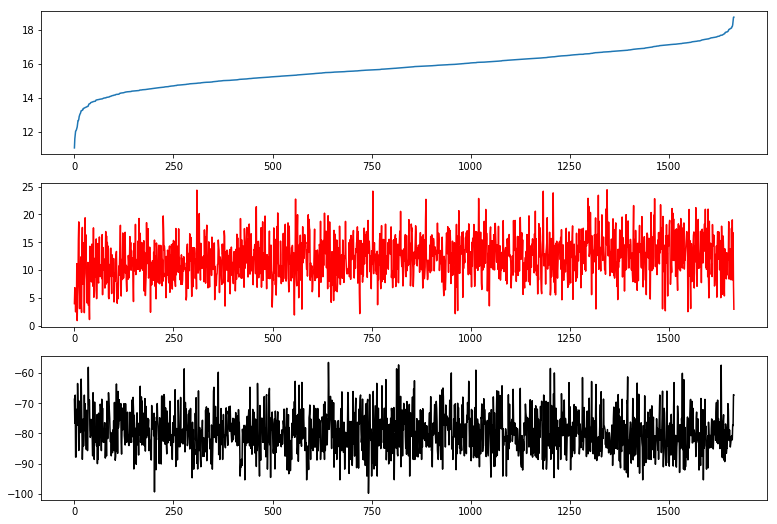

0 238
119 357
238 475
357 594
475 713
594 832
713 951
832 1070
951 1189
1070 1307
1189 1426
1307 1545
1426 1664


In [34]:
qmean_march, corr_march, qcorr_march = sort_vars(marchh)

953
1032


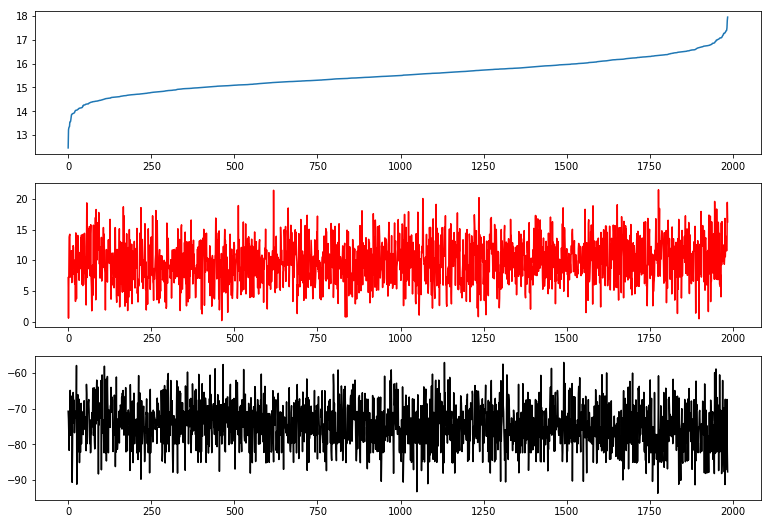

0 283
142 425
283 567
425 709
567 850
709 992
850 1134
992 1275
1134 1417
1275 1559
1417 1701
1559 1842
1701 1984


In [35]:
qmean_oct, corr_oct, qcorr_oct = sort_vars(octt)

6550
7008


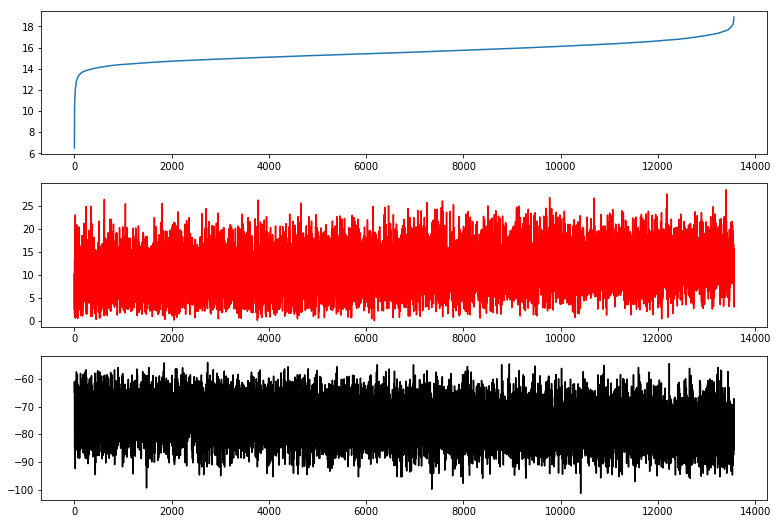

0 1937
969 2906
1937 3875
2906 4844
3875 5812
4844 6781
5812 7750
6781 8718
7750 9687
8718 10656
9687 11625
10656 12593
11625 13562


In [36]:
qmean_all, corr_all, qcorr_all = sort_vars(era_new)

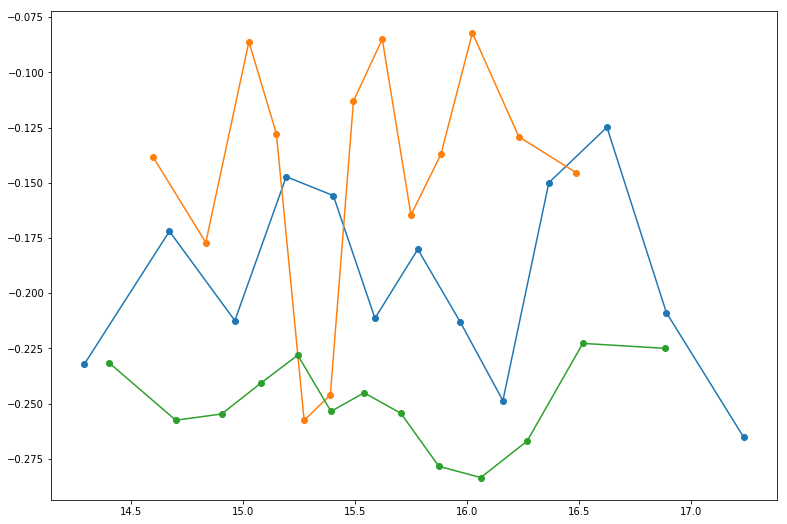

In [37]:
plt.figure(figsize=(13,9))
plt.plot(np.array(qmean_march),corr_march, '-o')
plt.plot(np.array(qmean_oct),corr_oct, '-o')
plt.plot(np.array(qmean_all),corr_all, '-o')

In [71]:
def sort_vars(dic):
    q925 = np.array(dic['q925'])
    q925s = np.array(dic['q925_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))

    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    shears =shearss[0]#np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]
    
    
    q925 = q925*1000 #np.array(qdics['high'])-np.array(qdic['high'])#

    sort = np.argsort(q925)
    q = q925[sort]
    #qq  = q925
    shear = shears[sort]
    tmin = np.array(dic['tmin'])[sort]
    linsp = np.linspace(0,len(q925)-1,15)
    
    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    
    for start,end in enumerate(inds[2::]):  #
        #ipdb.set_trace()
        qmean.append(np.median(q[inds[start]:end]))
        
        corr.append(stats.pearsonr(shear[inds[start]:end],tmin[inds[start]:end])[0])    
        qcorr.append(np.sum(q[inds[start]:end]>0.01) / np.sum(np.isfinite(q[inds[start]:end])) *100)  

#         ttslope, intercept, rc, p, std_err = linregress(shear[start:end],tmin[start:end])    
#         ccslope, intercept, rt, p, std_err = linregress(q[start:end], shear[start:end])
#         corr.append(ttslope) 
#         qcorr.append(ccslope) 
    return qmean, corr, qcorr

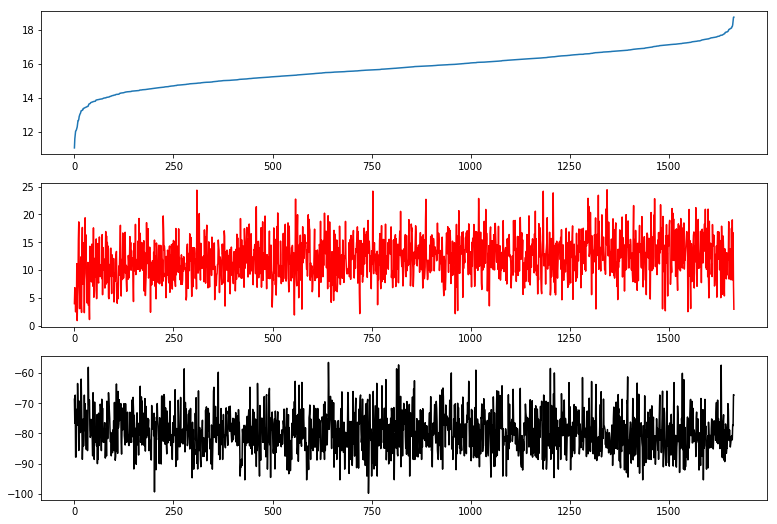

In [72]:
qmean_march, corr_march, qcorr_march = sort_vars(marchh)

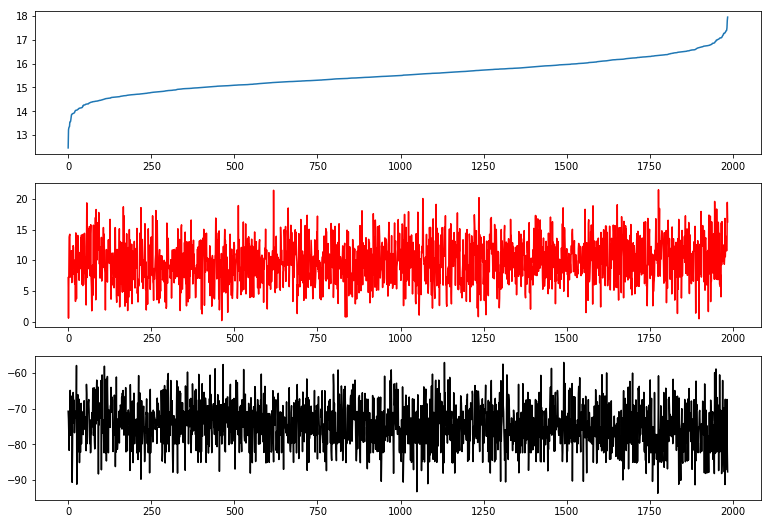

In [73]:
qmean_oct, corr_oct, qcorr_oct = sort_vars(octt)

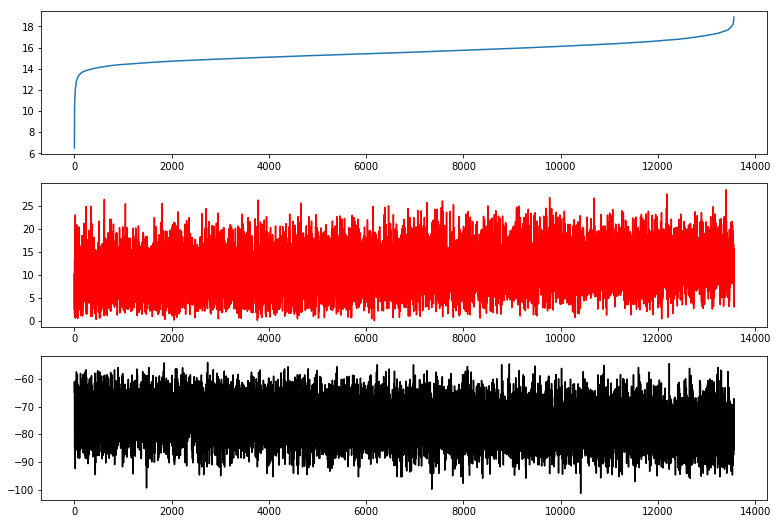

In [74]:
qmean_all, corr_all, qcorr_all = sort_vars(era_new)

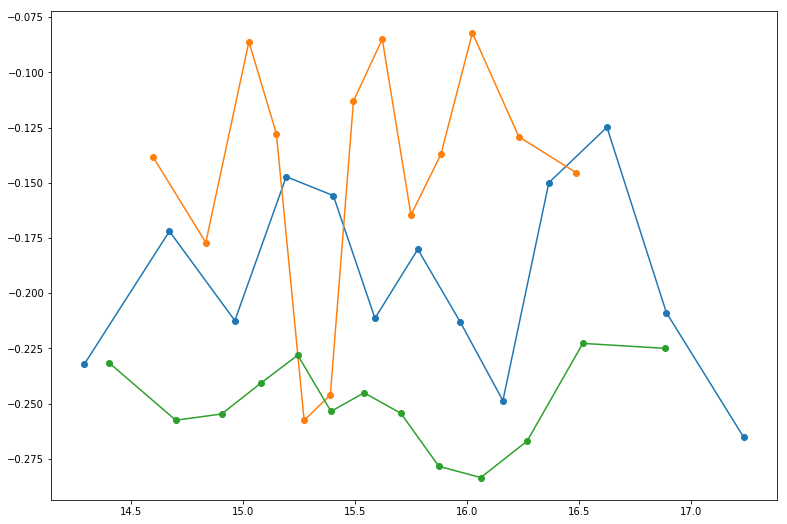

In [75]:
plt.figure(figsize=(13,9))
plt.plot(np.array(qmean_march),corr_march, '-o')
plt.plot(np.array(qmean_oct),corr_oct, '-o')
plt.plot(np.array(qmean_all),corr_all, '-o')